Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA


Simulate dataset


In [2]:
np.random.seed(42)
n = 200

data = {
    'CustomerID': range(1, n+1),
    'Age': np.random.randint(15, 65, n),
    'Gender': np.random.choice(['Male', 'Female'], n),
    'VisitsPerMonth': np.random.poisson(3, n),
    'AvgTicketSpend': np.random.normal(300, 50, n).astype(int),
    'AvgSnackSpend': np.random.normal(150, 30, n).astype(int),
    'Membership': np.random.choice(['Regular', 'Premium'], n, p=[0.7, 0.3])
}

df = pd.DataFrame(data)

preprocessing


In [3]:
df_encoded = df.copy()
df_encoded['Gender'] = df_encoded['Gender'].map({'Male': 0, 'Female': 1})
df_encoded['Membership'] = df_encoded['Membership'].map({'Regular': 0, 'Premium': 1})

features = ['Age', 'Gender', 'VisitsPerMonth', 'AvgTicketSpend', 'AvgSnackSpend', 'Membership']
X = df_encoded[features]


Feature scaling


In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


K means clustering


In [5]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster_KMeans'] = kmeans.fit_predict(X_scaled)

 DBSCAN Clustering

In [6]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
df['Cluster_DBSCAN'] = dbscan.fit_predict(X_scaled)

Visualization with PCA

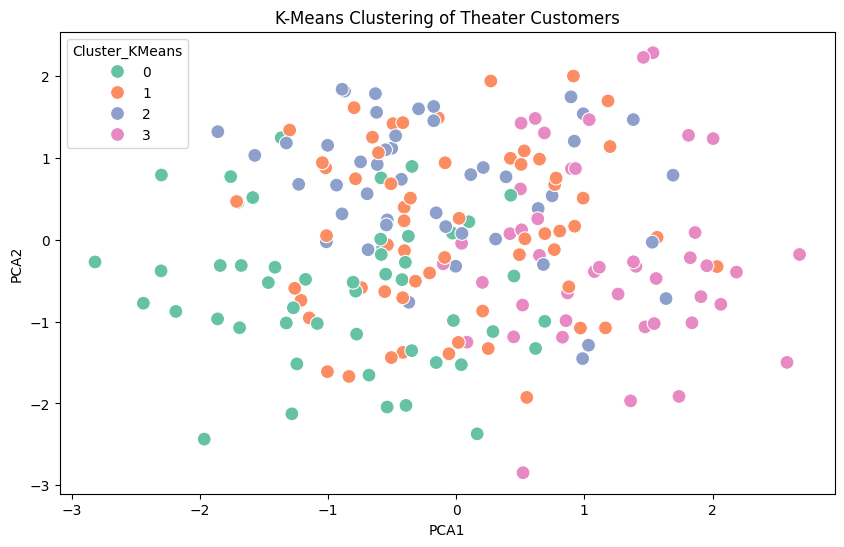

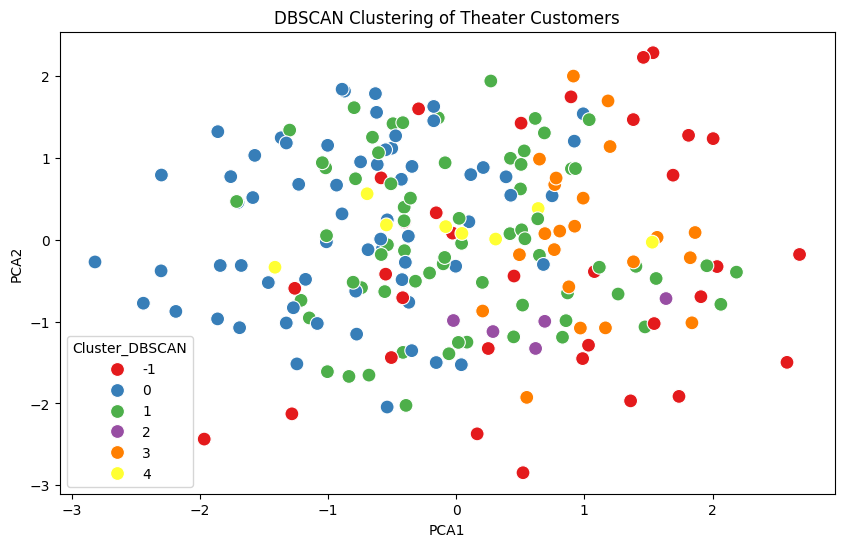

In [7]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster_KMeans', palette='Set2', s=100)
plt.title("K-Means Clustering of Theater Customers")
plt.savefig("kmeans_theater_clusters.png")
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster_DBSCAN', palette='Set1', s=100)
plt.title("DBSCAN Clustering of Theater Customers")
plt.savefig("dbscan_theater_clusters.png")
plt.show()


Summary

In [8]:
print("Cluster Sizes (KMeans):")
print(df['Cluster_KMeans'].value_counts())
print("\nAverage Spending by Cluster:")
print(df.groupby('Cluster_KMeans')[['AvgTicketSpend', 'AvgSnackSpend']].mean().round(2))

# Optional: Save dataset
df.to_csv("theater_customer_segments.csv", index=False)


Cluster Sizes (KMeans):
Cluster_KMeans
1    60
0    50
2    46
3    44
Name: count, dtype: int64

Average Spending by Cluster:
                AvgTicketSpend  AvgSnackSpend
Cluster_KMeans                               
0                       286.94         131.38
1                       293.13         150.88
2                       329.20         166.57
3                       325.34         169.45
